# Simulation a function:
1. Single input and single output 
2. Non-linear

Simulation function:

function 1:

$f(x)=sin(5{\pi}x)/(5{\pi}x)$

function 2:

$f(x)=sign(5{\pi}x)$


In [ ]:
%tensorflow_version 1.x 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.version)

TensorFlow 1.x selected.
<module 'tensorflow._api.v1.version' from '/tensorflow-1.15.2/python3.6/tensorflow_core/_api/v1/version/__init__.py'>


Model_1 Total Parameter:  571
Epoch:  0 Loss:  0.09860793
Epoch:  100 Loss:  0.080783464
Epoch:  200 Loss:  0.056394797
Epoch:  300 Loss:  0.039040938
Epoch:  400 Loss:  0.027391426
Epoch:  500 Loss:  0.020050434
Epoch:  600 Loss:  0.014680759
Epoch:  700 Loss:  0.010750365
Epoch:  800 Loss:  0.007874164
Epoch:  900 Loss:  0.0057643126
Model_2 Total Parameter:  572
Epoch:  0 Loss:  0.13241178
Epoch:  100 Loss:  0.07112784
Epoch:  200 Loss:  0.016500706
Epoch:  300 Loss:  0.005058832
Epoch:  400 Loss:  0.0044242353
Epoch:  500 Loss:  0.0037822498
Epoch:  600 Loss:  0.0031985359
Epoch:  700 Loss:  0.002733635
Epoch:  800 Loss:  0.0024524385
Epoch:  900 Loss:  0.0022358003


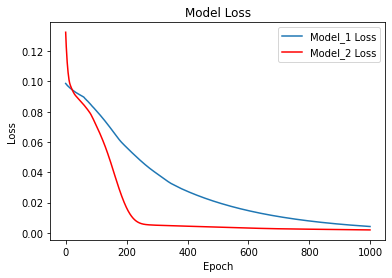

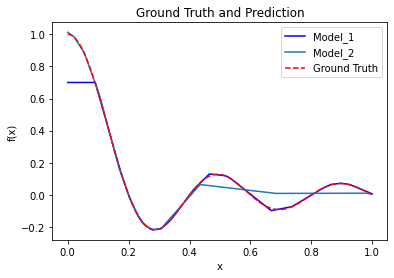

In [ ]:
# function 1 preparation
X_train= np.arange(0.0001,1,0.001,dtype=np.float32).reshape(-1,1)
Y_train = (np.sin(5*np.pi*X_train)/(5*np.pi*X_train)).reshape(-1,1)

tf.reset_default_graph()
x = tf.placeholder(tf.float32,shape=[None,1])
y = tf.placeholder(tf.float32,shape=[None,1])

# Model 1 
model1_h1 = tf.layers.dense(inputs=x, units=5, activation=tf.nn.relu, name='model1_h1')       
model1_h2 = tf.layers.dense(inputs=model1_h1, units=10, activation=tf.nn.relu, name='model1_h2')        
model1_h3 = tf.layers.dense(inputs=model1_h2, units=10, activation=tf.nn.relu, name='model1_h3')        
model1_h4 = tf.layers.dense(inputs=model1_h3, units=10, activation=tf.nn.relu, name='model1_h4')        
model1_h5 = tf.layers.dense(inputs=model1_h4, units=10, activation=tf.nn.relu, name='model1_h5')         
model1_h6 = tf.layers.dense(inputs=model1_h5, units=10, activation=tf.nn.relu, name='model1_h6') 
model1_h7 = tf.layers.dense(inputs=model1_h6, units=5, activation=tf.nn.relu, name='model1_h7') 
model1_output = tf.layers.dense(inputs=model1_h7, units=1, name='model1_output')                        

# optimization
model1_loss = tf.losses.mean_squared_error(y, model1_output)   
model1_optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
model1_train_op=model1_optimizer.minimize(model1_loss)

# parameters
total_parameters = 0
for variable in tf.trainable_variables():
    if(variable.name.find("model1")>=0):
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
print("Model_1 Total Parameter: ",total_parameters)

# training
sess = tf.Session() 
sess.run(tf.global_variables_initializer())        
EPOCH = 1000

model1_loss_list1 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred = sess.run([model1_train_op, model1_loss, model1_output], feed_dict={x: X_train, y: Y_train})
    model1_loss_list1.append(l)
    if i%100 == 0:
        print("Epoch: ",i,"Loss: ",l)


# Model 2 
model2_h1 = tf.layers.dense(inputs=x, units=10, activation=tf.nn.relu, name='model2_h1')       
model2_h2 = tf.layers.dense(inputs=model2_h1, units=18, activation=tf.nn.relu, name='model2_h2')        
model2_h3 = tf.layers.dense(inputs=model2_h2, units=15, activation=tf.nn.relu, name='model2_h3')        
model2_h4 = tf.layers.dense(inputs=model2_h3, units=4, activation=tf.nn.relu, name='model2_h4')                
model2_output = tf.layers.dense(inputs=model2_h4, units=1, name='model2_output')                        # output layer

# optimization
model2_loss = tf.losses.mean_squared_error(y, model2_output)   
model2_optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
model2_train_op=model2_optimizer.minimize(model2_loss)

#parameters
total_parameters = 0
for variable in tf.trainable_variables():
    if(variable.name.find("model2")>=0):
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
print("Model_2 Total Parameter: ",total_parameters)

# train model
sess = tf.Session() 
sess.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 1000
model2_loss_list1 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred_2 = sess.run([model2_train_op, model2_loss, model2_output], feed_dict={x: X_train, y: Y_train})
    model2_loss_list1.append(l)
    if i%100 == 0:
        print("Epoch: ",i,"Loss: ",l)


#result visualization
epoch_list = np.arange(EPOCH)
plt.plot(epoch_list,model1_loss_list1)
plt.plot(epoch_list,model2_loss_list1,'r')
plt.legend(('Model_1 Loss','Model_2 Loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss');
plt.title("Model Loss")
plt.show()

plt.plot(X_train,pred,'b')
plt.plot(X_train,pred_2)
plt.plot(X_train,Y_train,"r--")
plt.legend(('Model_1','Model_2','Ground Truth'))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Ground Truth and Prediction")
plt.show()

Model_1 Total Parameter:  571
Epoch:  0 Loss:  0.99477386
Epoch:  100 Loss:  0.95860475
Epoch:  200 Loss:  0.828663
Epoch:  300 Loss:  0.45566478
Epoch:  400 Loss:  0.21091656
Epoch:  500 Loss:  0.162708
Epoch:  600 Loss:  0.13924994
Epoch:  700 Loss:  0.12311552
Epoch:  800 Loss:  0.109261736
Epoch:  900 Loss:  0.09633807
Model_2 Total Parameter:  572
Epoch:  0 Loss:  1.0233448
Epoch:  100 Loss:  0.9482607
Epoch:  200 Loss:  0.8327052
Epoch:  300 Loss:  0.63801724
Epoch:  400 Loss:  0.5410484
Epoch:  500 Loss:  0.31947064
Epoch:  600 Loss:  0.1472522
Epoch:  700 Loss:  0.1262221
Epoch:  800 Loss:  0.1220035
Epoch:  900 Loss:  0.11871879


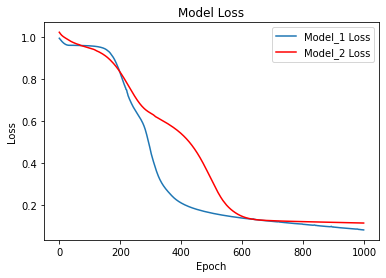

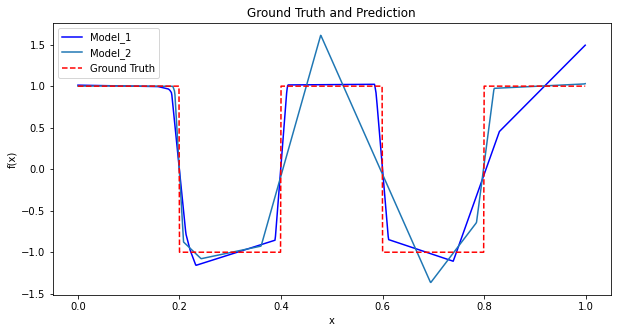

In [ ]:
# function 2:
X_train= np.arange(0.0001,1,0.001,dtype=np.float32).reshape(-1,1)
Y_train= (np.sign(np.sin(5*np.pi*X_train))).reshape(-1,1)

tf.reset_default_graph()
x = tf.placeholder(tf.float32,shape=[None,1])
y = tf.placeholder(tf.float32,shape=[None,1])

# Model 1 
model1_h1 = tf.layers.dense(inputs=x, units=5, activation=tf.nn.relu, name='model1_h1')       
model1_h2 = tf.layers.dense(inputs=model1_h1, units=10, activation=tf.nn.relu, name='model1_h2')        
model1_h3 = tf.layers.dense(inputs=model1_h2, units=10, activation=tf.nn.relu, name='model1_h3')        
model1_h4 = tf.layers.dense(inputs=model1_h3, units=10, activation=tf.nn.relu, name='model1_h4')        
model1_h5 = tf.layers.dense(inputs=model1_h4, units=10, activation=tf.nn.relu, name='model1_h5')         
model1_h6 = tf.layers.dense(inputs=model1_h5, units=10, activation=tf.nn.relu, name='model1_h6') 
model1_h7 = tf.layers.dense(inputs=model1_h6, units=5, activation=tf.nn.relu, name='model1_h7') 
model1_output = tf.layers.dense(inputs=model1_h7, units=1, name='model1_output')                        # output layer

# optimization
model1_loss = tf.losses.mean_squared_error(y, model1_output)   
model1_optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
model1_train_op=model1_optimizer.minimize(model1_loss)

# parameters
total_parameters = 0
for variable in tf.trainable_variables():
    if(variable.name.find("model1")>=0):
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
print("Model_1 Total Parameter: ",total_parameters)

# training
sess = tf.Session() 
sess.run(tf.global_variables_initializer())        
EPOCH = 1000

model1_loss_list1 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred = sess.run([model1_train_op, model1_loss, model1_output], feed_dict={x: X_train, y: Y_train})
    model1_loss_list1.append(l)
    if i%100 == 0:
        print("Epoch: ",i,"Loss: ",l)


# Model 2 
model2_h1 = tf.layers.dense(inputs=x, units=10, activation=tf.nn.relu, name='model2_h1')       
model2_h2 = tf.layers.dense(inputs=model2_h1, units=18, activation=tf.nn.relu, name='model2_h2')        
model2_h3 = tf.layers.dense(inputs=model2_h2, units=15, activation=tf.nn.relu, name='model2_h3')        
model2_h4 = tf.layers.dense(inputs=model2_h3, units=4, activation=tf.nn.relu, name='model2_h4')                
model2_output = tf.layers.dense(inputs=model2_h4, units=1, name='model2_output')                        # output layer

# optimization
model2_loss = tf.losses.mean_squared_error(y, model2_output)   
model2_optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
model2_train_op=model2_optimizer.minimize(model2_loss)

#parameters
total_parameters = 0
for variable in tf.trainable_variables():
    if(variable.name.find("model2")>=0):
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
print("Model_2 Total Parameter: ",total_parameters)

# train model
sess = tf.Session() 
sess.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 1000
model2_loss_list1 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred_2 = sess.run([model2_train_op, model2_loss, model2_output], feed_dict={x: X_train, y: Y_train})
    model2_loss_list1.append(l)
    if i%100 == 0:
        print("Epoch: ",i,"Loss: ",l)


#result visualization
epoch = np.arange(EPOCH)
plt.plot(epoch,model1_loss_list1)
plt.plot(epoch,model2_loss_list1,'r')
plt.legend(('Model_1 Loss','Model_2 Loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss');
plt.title("Model Loss")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(X_train,pred,'b')
plt.plot(X_train,pred_2)
plt.plot(X_train,Y_train,"r--")
plt.legend(('Model_1','Model_2','Ground Truth'))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Ground Truth and Prediction")
plt.show()